In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fauzanfa21","key":"afb5133e582b7741b79cdd237de3416d"}'}

In [2]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 118MB/s]


In [4]:
!mkdir diabetes-prediction-dataset
!unzip diabetes-prediction-dataset.zip -d diabetes-prediction-dataset
!ls diabetes-prediction-dataset

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes-prediction-dataset/diabetes_prediction_dataset.csv  
diabetes_prediction_dataset.csv


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder, StandardScaler

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [6]:


df = pd.read_csv('diabetes-prediction-dataset/diabetes_prediction_dataset.csv')



In [7]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [8]:
df.describe(include="all")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [9]:
df.shape

(100000, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [11]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

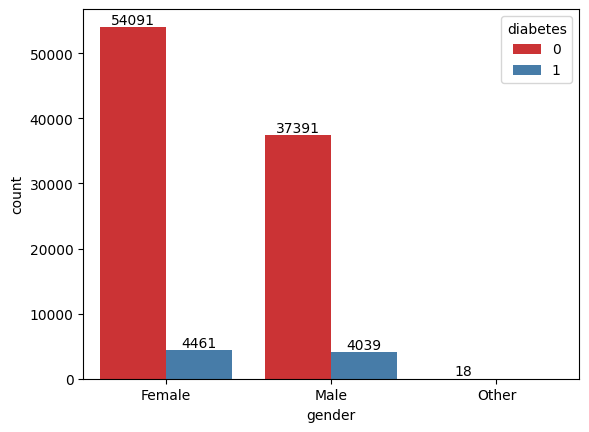

In [ ]:
ax = sns.countplot(x='gender', hue='diabetes', data=df, palette= "Set1")
for label in ax.containers:
    ax.bar_label(label)
plt.show()

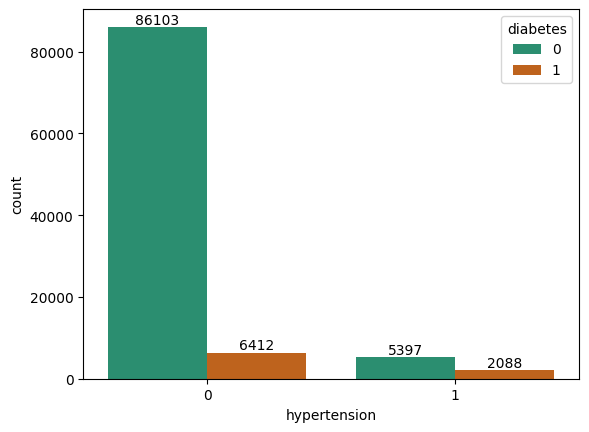

In [ ]:


# Visualising the distribution between Hyptertension and Diabetes
bx = sns.countplot(x='hypertension', hue='diabetes', data=df, palette='Dark2')
for label in bx.containers:
    bx.bar_label(label)
plt.show()



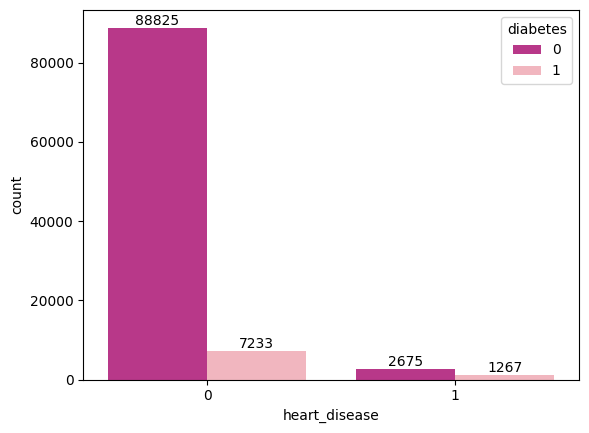

In [ ]:
# Visualising the distribution between Heart_disease and Diabetes
cx = sns.countplot(x='heart_disease', hue='diabetes', data=df, palette='RdPu_r')
for label in cx.containers:
    cx.bar_label(label)
plt.show()

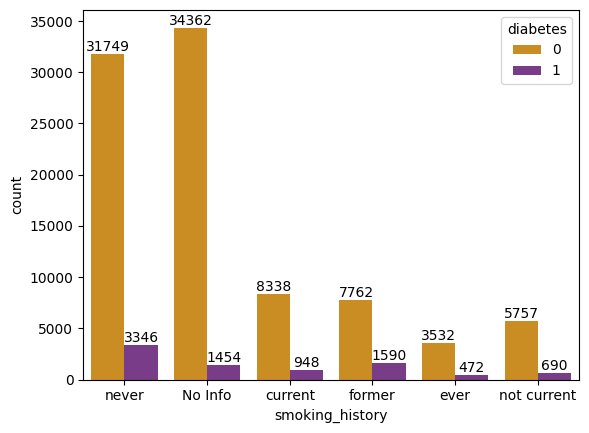

In [ ]:
# Visualising the distribution between smoking_history and Diabetes
dx = sns.countplot(x='smoking_history', hue='diabetes', data=df, palette='CMRmap_r')
for label in dx.containers:
    dx.bar_label(label)
plt.show()

In [12]:
le = LabelEncoder()

list_str = ['gender', 'smoking_history']
for c in list_str:
    df[c] = le.fit_transform(df[c])

In [ ]:
X = df.drop(['diabetes'], axis = 1)
y = df['diabetes']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [ ]:
model = Sequential([
    Dense(32, activation = 'relu',input_dim=X.shape[-1]),

    Dense(32, activation = 'relu'),

    Dense(1, activation = 'sigmoid')
])

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1345 (5.25 KB)
Trainable params: 1345 (5.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


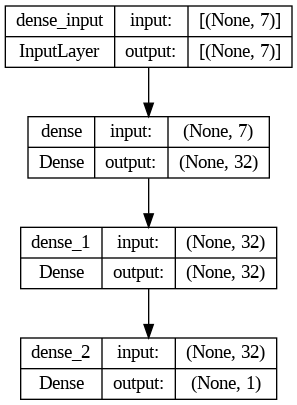

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
model.fit(xtrain, ytrain, epochs = 20, batch_size = 16, validation_data = (xtest, ytest))

Epoch 1/20
4375/4375 [==============================] - 14s 3ms/step - loss: 0.1614 - accuracy: 0.9419 - val_loss: 0.1481 - val_accuracy: 0.9474
Epoch 2/20
4375/4375 [==============================] - 15s 3ms/step - loss: 0.1392 - accuracy: 0.9503 - val_loss: 0.1381 - val_accuracy: 0.9511
Epoch 3/20
4375/4375 [==============================] - 11s 3ms/step - loss: 0.1321 - accuracy: 0.9526 - val_loss: 0.1327 - val_accuracy: 0.9520
Epoch 4/20
4375/4375 [==============================] - 11s 2ms/step - loss: 0.1298 - accuracy: 0.9537 - val_loss: 0.1309 - val_accuracy: 0.9531
Epoch 5/20
4375/4375 [==============================] - 12s 3ms/step - loss: 0.1287 - accuracy: 0.9538 - val_loss: 0.1304 - val_accuracy: 0.9529
Epoch 6/20
4375/4375 [==============================] - 13s 3ms/step - loss: 0.1282 - accuracy: 0.9540 - val_loss: 0.1390 - val_accuracy: 0.9489
Epoch 7/20
4375/4375 [==============================] - 12s 3ms/step - loss: 0.1280 - accuracy: 0.9541 - val_loss: 0.1319 - val_ac

In [ ]:
loss, accuracy = model.evaluate(xtest, ytest)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

938/938 [==============================] - 2s 2ms/step - loss: 0.1315 - accuracy: 0.9527
Test loss: 0.1315
Test accuracy: 0.9527


In [ ]:
model.save('./diabetes.h5')

In [ ]:
model= tf.keras.models.load_model('./diabetes.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./diabetes.tflite","wb").write(tflite_model)